# 0.0 - Imports Libraries

In [1]:
import time
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt


from sklearn                 import metrics  as mt
from sklearn.tree            import DecisionTreeClassifier
from sklearn.tree            import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

# 1.0 - Load Dataset

In [2]:
# Train Dataset
df_X_train = pd.read_csv( '../dataset/classificacao/X_training.csv' )
y_train = pd.read_csv( '../dataset/classificacao/y_training.csv' )

# Validattion Dataset
df_X_val = pd.read_csv( '../dataset/classificacao/X_validation.csv' )
y_val = pd.read_csv( '../dataset/classificacao/y_validation.csv' )

# Test
df_X_test = pd.read_csv( '../dataset/classificacao/X_test.csv' )
y_test = pd.read_csv( '../dataset/classificacao/y_test.csv' )

# 2.0 - Decision Tree Classifier

## 2.0.1 - Feature Selection

In [3]:
# Selected Features
features = ['age', 'class', 'flight_distance', 'inflight_wifi_service', 'departure_arrival_time_convenient','ease_of_online_booking', 
            'gate_location', 'food_and_drink','online_boarding', 'seat_comfort', 'inflight_entertainment','on_board_service', 
            'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 
            'departure_delay_in_minutes', 'arrival_delay_in_minutes']

X_train = df_X_train.loc[:, features]
X_val   = df_X_val.loc[:, features]
X_test = df_X_test.loc[:, features]

Parameter
* max_depth

## 2.1 - Performance for Train Dataset

In [5]:
# Define 
model_tree = DecisionTreeClassifier( random_state=77 )

# Fit
model_tree.fit( X_train, y_train )

# Predict
y_pred_train = model_tree.predict( X_train )

# Performance Metrics
accuracy_train = mt.accuracy_score( y_train, y_pred_train )
precision_train = mt.precision_score( y_train, y_pred_train )
recall_train = mt.recall_score( y_train, y_pred_train )
f1_score_train = mt.f1_score( y_train, y_pred_train )


print( f'A Acurácia é: {accuracy_train:.2%}' )
print( f'A Precisão é: {precision_train:.2%}' )
print( f'Recall é: {recall_train:.2%}' )
print( f'F1-Score é: {f1_score_train:.2%}' )

A Acurácia é: 100.00%
A Precisão é: 100.00%
Recall é: 100.00%
F1-Score é: 100.00%


## 2.2 - Performance for Validation Dataset

In [6]:
# Define and fit model
model_tree = DecisionTreeClassifier( random_state=77 )
model_tree.fit( X_train, y_train )

# Predict
y_pred_val = model_tree.predict( X_val )

# Performance Metrics
accuracy_val = mt.accuracy_score( y_val, y_pred_val )
precision_val = mt.precision_score( y_val, y_pred_val )
recall_val = mt.recall_score( y_val, y_pred_val )
f1_score_val = mt.f1_score( y_val, y_pred_val )


print( f'A Acurácia é: {accuracy_val:.3%}' )
print( f'A Precisão é: {precision_val:.3%}' )
print( f'Recall é: {recall_val:.3%}' )
print( f'F1-Score é: {f1_score_val:.3%}' )

A Acurácia é: 92.950%
A Precisão é: 91.402%
Recall é: 92.427%
F1-Score é: 91.912%


## 2.3 Hyperparameters Fine Tunning

In [7]:
max_depth = np.arange( 1, 51, 1 )

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [8]:
for i in max_depth:
    model_tree = DecisionTreeClassifier( max_depth=i, random_state=77 )
    model_tree.fit( X_train, y_train )
    y_pred = model_tree.predict( X_val )

    accuracy = mt.accuracy_score( y_val, y_pred )
    precision = mt.precision_score( y_val, y_pred )
    recall = mt.recall_score( y_val, y_pred )
    f1_score = mt.f1_score( y_val, y_pred )

    accuracy_list.append( accuracy )
    precision_list.append( precision )
    recall_list.append( recall )
    f1_score_list.append( f1_score )

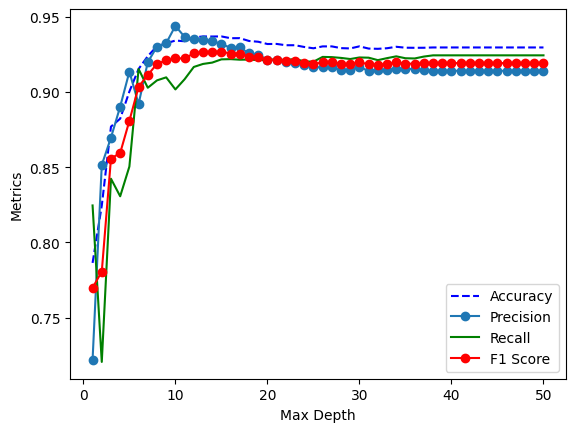

In [9]:
plt.plot( max_depth, accuracy_list, 'b--', label='Accuracy' )
plt.plot( max_depth, precision_list, 'o-', label='Precision' )
plt.plot( max_depth, recall_list, 'g-', label='Recall' )
plt.plot( max_depth, f1_score_list, 'r-o', label='F1 Score' )
plt.xlabel( 'Max Depth' )
plt.ylabel( 'Metrics' )
plt.legend();

In [10]:
best_depth = max_depth[ np.argmax(recall_list) ]
best_depth

38

## 2.4 - Performance for Test Dataset

In [11]:
# Define and Fit Model
model_tree = DecisionTreeClassifier( max_depth=best_depth, random_state=77 )
model_tree.fit( pd.concat( [X_train, X_val] ), pd.concat( [y_train, y_val]) )

# Predict
y_pred_test = model_tree.predict( X_test )

# Performance Metrics
accuracy_test = mt.accuracy_score( y_test, y_pred_test )
precision_test = mt.precision_score( y_test, y_pred_test )
recall_test = mt.recall_score( y_test, y_pred_test )
f1_score_test = mt.f1_score( y_test, y_pred_test )

print( f'Test Accuracy: {accuracy_test:.3%}' )
print( f'Test Precision: {precision_test:.3%}' )
print( f'Test Recall: {recall_test:.3%}' )
print( f'Test F1 Score: {f1_score_test:.3%}' )

Test Accuracy: 93.496%
Test Precision: 92.636%
Test Recall: 92.538%
Test F1 Score: 92.587%
